# L’Europe décroche-t-elle des Etats-Unis ?

Xavier Timbeau  
14 mai 2025

In [ ]:
ofce::init_qmd()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Using libcurl 8.10.1 with Schannel


Attachement du package : 'curl'


L'objet suivant est masqué depuis 'package:readr':

    parse_date



Attachement du package : 'scales'


L'objet suivant est masqué depuis 'package:purrr':

    discard


L'objet suivant est masqué depuis 'package:readr':

    col_factor


qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103

[conflicted] Will prefer rlang::set_names over any other package.

## Le rapport Draghi

Publié au printemps 2024, le rapport Draghi a rappelé des éléments connus. Depuis la crise financière de 2008, l’Europe (ici la zone euro) décroche des Etat-Unis lorsqu’on utilise le Produit intérieur brut en volume (donc corrigé de l’inflation[1]) et en parité de pouvoir d’achat (donc comparable entre zones géographiques[2]) et par tête (donc corrigé de la démographie[3]) comme indicateur (@fig-pibcap). Alors que l’écart entre les Etats-Unis et la zone euro n’était que de 15% en 2008, à peu près constant depuis la création de la zone euro, il est aujourd’hui (en 2024) de 25%. Lentement, au rythme d’un demi point par an, la zone euro semble perdre du terrain.

[1] Les données considérées sont donc les PIB en valeur, divisés par le déflateur du PIB qui peut différer des indices de prix à la consommation. De nombreuses réserves s’appliquent aux déflateurs et en particulier à leur utilisation pour des comparaisons internationales du fait de méthodes non homogénéisées entre les instituts statistiques.

[2] La méthode consiste à utiliser pour une année de base (ici 2021) les indices de parité de pouvoir d’achat construit par la Banque Mondiale à partir de la valeur de paniers de biens et services identiques dans différents pays. Les indices de PPP (ou PPA en français) ne sont pas construits comme les déflateurs des comptabilités nationales. On suppose que ces différences de méthode sont d’un ordre de grandeur inférieur aux évolutions mesurées.

[3] Une différence démographique importante subsiste entre les pays puisque on ne prend pas en compte le partage de la population entre actifs et inactifs (jeunes, séniors, adultes dans l’inactivité).

In [ ]:
oecd <- ofce::source_data("oecd.R") |> 
  group_by(year) |> 
  filter(year>1980) |> 
  mutate(
    clabel = countrycode::countrycode(country, "iso3c", "country.name.fr"),
    clabel = ifelse(country=="EUZ", "Zone euro", clabel),
    us1 = value/value[country=="USA"],
    relus = value/value[country=="USA"]-1) |>
  group_by(country) |> 
  mutate(
    label = ifelse(year==max(year), country, NA_character_)) |> 
  ungroup() |> 
  mutate(
    lline = glue("<b>{round(value/1000,1)} k$</b> (2021, ppp)/an/personne"),
    rline = ifelse(country=="USA", "", glue(" ({ifelse(relus>0, '+','')}{round(relus*100)}% USA)")),
    tooltip = glue("<b>{clabel}</b>
                   {year}
                   {lline}{rline}")   ) |> 
  rename(ppp = value) |> 
  select(year, country, us1, ppp, label, tooltip) |> 
  pivot_longer(cols = c(us1, ppp), names_to = "variable", values_to = "value") |> 
  mutate(label = ifelse(!is.na(label)&variable=="us1"&country!="USA", glue("{label} ({round(100*value)}%)"), label))

The first warning was:
ℹ In argument: `clabel = countrycode::countrycode(country, "iso3c",
  "country.name.fr")`.
ℹ In group 11: `year = 1991`.
Caused by warning:
! Some values were not matched unambiguously: EUZ
ℹ Run `dplyr::last_dplyr_warnings()` to see the 35 remaining warnings.

In [ ]:
tabsetize(plots, r=2)

Le contraste à l’intérieur de la zone euro est important, entre une performance plus importante des Pays-Bas (un écart de 7% avec les Etats Unis en 2024) et l’Espagne (un écart de 36%). Mais c’est bien autour de 2008 que les choses se jouent (onglet relatif aux USA sur le @fig-pibcap), même si pour certains pays (la France et l’Italie notamment) le décrochage se produit antérieurement, mais probablement pour des raisons démographiques) : depuis 2008, les Pays-Bas perdent 13 points de PIB par tête par rapport aux Etats-Unis, l’Allemagne et la France 12 points, l’Italie et l’Espagne 15 et 10 points respectivement. C’est bien la simultanéité de cette évolution qui la rend frappante, d’autant qu’elle ne se limite pas à l’Union Européenne, comme l’indiquent les trajectoire de la Suisse ou du Royaume-Uni.

De nombreuses explications ont été avancées pour expliquer le décrochage depuis 2008. On peut citer :

-   Une explication « keynésienne » selon laquelle les politiques macroéconomiques menées après la crise financière de 2008 et les conséquences de la crise des dettes souveraines en zone euro qui ont conduit à un sous-investissement privé et public et une sur-épargne du continent conduisant à un accroissement de la position nette extérieur et une réduction relative des dettes publiques plus importante en zone Euro qu’ailleurs (voir iAGS \[@iags2019\] ). La crise sanitaire de 2020 a pu avoir des conséquences différenciées accentuant des trajectoires divergentes depuis 2008.

-   Une explication structurelle situant dans l’incomplétude de la zone euro, et en particulier la fragmentation financière, l’absence d’un marché de capitaux intégré, une trop grande importance du crédit bancaire dans le financement des entreprises, une concurrence insuffisante sur les marchés des biens et des services, un empilement normatif qui empêcheraient les entreprises européennes d’investir et d’innover et de prendre leur place dans la compétition technologique (voir @draghi2024).

-   Dans la même lignée, l’explication selon laquelle la lourdeur du système social et la redistribution qu’elle implique pèserait sur la compétitivité, l’allocation des ressources de la dépense publique et les effets négatif sur l’offre de travail conduisant par exemple les plus productifs à quitter l’Europe pour d’autres cieux (voir …).

-   Une explication par le prix de l’énergie. D’un côté la montée en puissance du marché carbone EU ETS (Emission Trade System) et du prix du carbone (principalement à partir du début de 2021 où le prix de la tonne de CO<sub>2</sub> passe de moins de 20€ à plus de 70€ durablement), la dépendance à l’énergie importée de Russie (principalement pour l’Allemagne) dont les conséquences ont été massives après l’invasion de l’Ukraine par la Russie (voir @geerolf2022) ou encore l’*Inflation Reduction Act* (2022, voir @cæ2023ira). Ces facteurs jouent principalement à partir de 2021 et plus encore à partir de 2022 pour conduire à un prix de l’énergie 3 fois plus élevé en Europe qu’aux Etats-Unis (@draghi2024), mais la marche est suffisamment importante pour que l’évolution remonte à quelques années auparavant.

-   Une explication technologique, selon laquelle le décrochage est lié à une vague d’innovation (digitalisation et services réseaux, robotique, intelligence artificielle, calcul massif mais aussi dans d’autres secteurs comme la production d’énergie (éolienne, panneaux solaires), les batteries électriques, biotechnologies) dont le cœur se situe entre la Chine et les Etats-Unis. La combinaison d’un système éducatif supérieur très performant, d’un système de financement de l’innovation efficace, d’une commande publique importante qui complète un marché à même de les absorber, d’un protectionnisme agressif sur ces technologies et de technologies partiellement caractérisées par des effets de réseau important (@dric2025).

## L’angle de la distribution des revenus

### Quelques remarques de méthode

Les explications rappelées ci-dessus partagent un diagnostic établi sur la base du PIB agrégé, ou moyen et pour la plupart sont sous l’angle de la production ou de la demande agrégée. Or, les évolutions des revenus sont aussi pertinentes pour juger de la capacité d’une économie à fournir un revenu à ses citoyens et peut être déclinée par catégorie de revenu.

In [ ]:
dina <- ofce::source_data("wid.R")$dina

labels <- c(p0p50 = "50% les moins riches",
            p50p90 = "des 50% les moins riches aux 10% les plus riches",
            p50p99 = "des 50% les moins riches aux 1% les plus riches",
            p90p99 = "des 90% les moins riches aux 1% les plus riches",
            p90p100 = "10% les plus riches",
            p99p100 = "1% les plus riches")

gg <- function(pays, variable = "aptincj992", type = "eurppp",
               percentile=c("p0p50", "p50p90", "p90p100")) {
  if(type=="eurppp") {
    interactive <- geom_point_interactive(
      aes( tooltip = tooltip,
           data_id = year, fill = country),
      shape=21, color="white", stroke = 0.1, size=0.75 ,
      hover_nearest = TRUE)
    ylab <- ylab("€ 2023, ppp, par tête par an")
    scaley <- scale_y_log10(
      limits = c(7500, 500000),
      labels = scales::label_number(scale=1/1000, suffix = "k"),
      breaks = c(20000, 30000, 50000, 100000, 150000, 200000),
      guide  = guide_axis_logticks()) 
  }
  if(type == "us1") {
    ylab <- ylab("€ 2023, ppp, par tête par an, USA = 1")
    scaley <- scale_y_log10(
      limits = c(.4, 2),
      guide  = guide_axis_logticks())
    interactive <- NULL
  }
  ggplot(dina |> filter(country%in%pays,
                        variable %in% !!variable,
                        type %in% !!type,
                        percentile %in% !!percentile)) +
    aes(x=year, y=revenu, color = country) +
    geom_line(linewidth = 0.5)+
    ggrepel::geom_text_repel(
      aes(label=label),
      size= 3 ,
      hjust =  0.5,
      nudge_x = 1.5,
      na.rm=TRUE,
      max.overlaps = Inf,
      min.segment.length=0.1,
      segment.size = 0.1,
      xlim = c(2023.5, Inf),
      direction = "y"
    ) +
    interactive +
    facet_wrap(
      vars(percentile), labeller = as_labeller(labels) )+
    scaley +
    scale_x_continuous(
      breaks = seq(1980, 2020, by = 10),
      expand = expansion(add = c(2, 6) ) ) +
    ylab +
    xlab(NULL) +
    ofce::scale_color_pays("iso2c") +
    guides(color = "none", fill = "none") +
    theme_ofce(
      panel.spacing = unit(12, 'pt'),
      axis.text = marquee::element_marquee(size = rel(0.7)),
      axis.text.x = marquee::element_marquee( hjust = 0, margin = margin(t=0)),
      axis.ticks.length.y = unit(-2, 'pt'),
      strip.text.x = marquee::element_marquee(size=rel(0.7), hjust = 0, width = 0.9),
      strip.text.y = marquee::element_marquee(size=rel(0.7), hjust = 0)) +
    ofce::ofce_caption(
      source = "World Inequality Database (WID), téléchargée le 10 mai 2025", ofce = FALSE, author = TRUE,
      code = "https://github.com/xtimbeau/decrochage",
      note = "Le revenu pré-taxation est la variable *ptinc*, le revenu post taxation est *diinc* ; pour le groupe d'âge *992* ; le partage *j* ; en euro 2023 constant, converti en parité pouvoir d'achat (*xlceupi999*) pour l'année 2023. Le revenu (pré et post) inclu les retraites (voir https://wid.world/codes-dictionary/). La zone euro (à 19 pays) est reconstituée à partir des données en centiles de chaque Etat membre" )
}

In [ ]:
plots <- list(
  "Revenu ajusté, après taxes et redistribution" = list(
    "USA, EUZ, GB, CHE" = gg(c("US","EUZ","GB", "CH"), "adiincj992"),
    "DEU, FRA, ITA, ESP, NLD" = gg(c("DE","FR","IT","ES","NL"), "adiincj992"),
    "relatif aux USA" = gg(c("US","DE","FR","IT","ES","NL", "GB", "CHE"), "adiincj992", "us1") ),
    "Revenu primaire avant taxes et redistribution" = list(
    "USA, EUZ, GB,CHE" = gg(c("US","EUZ","GB", "CH"), "aptincj992"),
    "DEU, FRA, ITA, ESP, NLD" = gg(c("DE","FR","IT","ES","NL"), "aptincj992"),
    "relatif aux USA" = gg(c("US", "DE","FR","IT","ES","NL", "GB", "CHE"), "aptincj992", "us1"))
)

tabsetize2(plots, girafy=TRUE, r=1.5)

Si le revenu découle de la production et de la rémunération des facteurs, d’autres éléments le modifient et suivant les catégories de revenu, la modification peut être importante. Pour les revenus les plus faibles, la redistribution (prestations sociales) nette des contributions (impôts directs et indirects) augmente le revenu primaire tiré des revenus d’activité. Pour les plus hauts revenus, la redistribution est généralement un prélèvement net sur le revenu primaire. Cependant, l’épargne accumulée vient accroître le revenu primaire tiré du travail et contribue à travers les revenus du capital au revenu.

Le travail titanesque accompli par les chercheur du *World Inequality Database* (WID), avec des contributions importantes de @piketty2018, permet d’approcher ces notions pour un grand nombre de pays et en remontant dans assez loin dans le temps. Les données fournies par le WID surpassent celles disponibles auprès des instituts statistiques nationaux, et selon les auteurs même (<https://wid.world/methodology/>), la publication de ces données demande sans doute des raccourcis saisissants, mais doivent inciter les instituts statistiques nationaux à publier de meilleurs données et mettre à disposition toute l’information nécessaire pour comprendre les inégalités de revenu et leurs évolutions. En particulier, la notion de comptes nationaux distribués doit beaucoup aux chercheurs du WID et commence à s’imposer comme un des éléments des comptes nationaux (@insee2023).

Pour un contrepoint aux évolutions agrégées, nous utilisons ici les notions de revenu pre taxation (la variable ptinc dans les bases du WID à peu près la notion de revenu primaire, dans laquelle les revenus différés comme la retraite sont cependant traités comme un revenu du travail – les cotisations retraites ne sont donc pas un prélèvement mais une épargne, une convention bienvenue pour les comparaisons internationales). Les revenus post taxation et distribution sont une construction complexe, proche de la notion de revenu disponible brut ajusté, qui est donc le revenu moins les impôts, y compris les impôts indirects, et augmenté des dépenses publiques dont bénéficient les individus, qu’elles soit individualisables et transférées en monnaie, ou qu’elles soient collectives et imputées selon une série de conventions. La complexité, ou le recours à des conventions, n’est pas en soit problématique, mais à ce stade, les choix faits par le WID ne sont pas une convention complètement discutée et délibérée. On ne peut souhaiter que le travail engagé se poursuive et se diffuse afin de pouvoir disposer d’éléments de comparaison aussi solides que possible.

Comme pour les données agrégées, nous considérons les évolutions en valeur déflatée (par le déflateur du PIB en général, non différencié selon les catégories de revenus), ramenées à la parité de pouvoir d’achat (2023 comme une année de référence). Comme évoqué en note de bas de page, ces choix masquent des difficultés de méthode non résolus à ce stade, et en ajoutent quelques uns, comme par exemple le fait de ne pas différencier les indices de prix par catégorie de revenu alors que les cœfficients budgétaires sont hétérogènes.

## Le décrochage des plus riches

In [ ]:
ggpp <- function(pays, percentile=c("p0p50", "p50p90", "p90p99", "p99p100")) {
  ggplot(dina |> 
         filter(type=="eurppp", 
                variable == "aptincj992",
                country %in% pays,
                percentile %in% !!percentile)) +
  aes(x =year, y = prepost, color = country, group=country) +
  geom_hline(yintercept = 1, linewidth = 0.25, color= "grey") + 
  geom_line() +
  facet_wrap(vars(percentile), labeller = as_labeller(labels), nrow = 1) +
  ofce::scale_color_pays("iso2c") +
    ggrepel::geom_text_repel(
      aes(label=label),
      size= 3 ,
      hjust =  0.5,
      nudge_x = 1.5,
      na.rm=TRUE,
      max.overlaps = Inf,
      min.segment.length=0.1,
      segment.size = 0.1,
      xlim = c(2023.5, Inf),
      direction = "y"
    )+
    scale_x_continuous(
      breaks = seq(1980, 2020, by = 20),
      expand = expansion(add = c(2, 10) ) ) +
    scale_y_log10(
      limits = c(0.5, 2),
      breaks = seq(0.5, 2, 0.25),
      guide  = guide_axis_logticks()) +
    guides(color = "none", fill = "none") +
    xlab(NULL)+
    ylab("ratio diinc/ptinc")+
    theme_ofce(
      panel.spacing = unit(12, 'pt'),
      axis.text = marquee::element_marquee(size = rel(0.7)),
      axis.text.x = marquee::element_marquee( hjust = 0, margin = margin(t=0)),
      axis.ticks.length.y = unit(-2, 'pt'),
      strip.text.x = marquee::element_marquee(size=rel(0.7), hjust = 0, width = 0.9),
      strip.text.y = marquee::element_marquee(size=rel(0.7), hjust = 0)) +
    ofce::ofce_caption(
      source = "World Inequality Database (WID), téléchargée le 10 mai 2025", ofce = FALSE, author = TRUE,
      code = "https://github.com/xtimbeau/decrochage",
      note = "Le revenu pré-taxation est la variable *ptinc*, le revenu post taxation est *diinc* ; pour le groupe d'âge *992* ; le partage *j* ; en euro 2023 constant, converti en parité pouvoir d'achat (*xlceupi999*) pour l'année 2023. Le revenu (pré et post) inclu les retraites (voir https://wid.world/codes-dictionary/). La zone euro (à 19 pays) est reconstituée à partir des données en centiles de chaque Etat membre" )
}   

plots <- list(
    "USA, EUZ, GB, CHE" = ggpp(c("US","EUZ","GB", "CH")),
    "DEU, FRA, ITA, ESP, NLD" = ggpp(c("DE","FR","IT","ES","NL")) )

tabsetize(plots)

Lorsqu’on ne regarde que les 50% les moins riches (@fig-prepost), trois constats modifient dramatiquement les diagnostics de décrochage.

1.  Pour la zone euro dans son ensemble, comme pour la majorité des Etats membres, le revenu par individu en parité de pouvoir d’achat après redistribution est plus élévé qu’aux Etats-Unis (@fig-percentile, notamment l’onglet relatif aux USA). L’écart est constant dans la plupart des pays, s’est fortement réduit en Espagne. L’Italie présente une trajectoire de décrochage manifeste, que ce soit par rapport aux Etats-Unis mais aussi aux pays de la zone euro. La France dans une situation plutôt favorable, bien que les 10 dernières années aient vu une progression faible de ces revenus.

2.  Paradoxalement, pour la moitié de la population, le constat tient pour les revenus primaires y compris retraite (@fig-percentile, onglet Revenu primaire avant taxes et redistribution). Ainsi, ce n’est pas la redistribution (pretations et dépenses publiques, nettes des impôts) qui permet aux 50% les moins riches de bénéficier d’un niveau de vie supérieur que les 50% les moins riches aux Etats-Unis, mais les revenus tirés de l’activité, qu’ils soient immédiats ou différés. Probablement, les systèmes de retraites européens jouent un rôle important mais au delà, les systèmes de rémunération plancher (salaire minimum) et un encadrement des conditions de temps partiels participent aussi à cette caractéristique. Comme l’indique le @fig-prepost, la redistribution pour les 50% les moins riches s’accroît de 1980 à aujourd’hui, dans tous les pays et de façon assez homogène. La trajectoire de la France et des Etats-Unis sont à ce titre assez proches.

3.  Pour les catégories de revenus entre les 50% les moins riches et les 10% les plus riches (soit 40% de la population), le diagnostic est mitigé. En revenus primaires, le décrochage est présent pour certains pays, mais moins flagrant. Alors que la contribution nette de cette catégorie de la population est presque constante (et proche de 0), le gain à la redistribution a fortement bénéficié aux américains de la même catégorie. En revanche, pour les 10% les plus riches, l’écart s’est fortement creusé, alors qu’il était déjà important en 1980, à part pour l’Allemagne (@fig-percentile, onglet relatif aux USA). Si le décrochage se produit, c’est donc dans ces catégories de revenu. La contribution de la redistribution à cet écart n’est pas très différente aux Etat-Unis et en Europe : les revenus des 10% plus riches sont plus taxés en Europe qu’aux Etats-Unis, dans une proportion importante, tout comme ceux des 1% les plus riches, et les évolutions de ces taxations sont assez parallèles. La France et la Suisse sont des cas particuliers avec une hausse très substantielle de la taxation des plus riches (les 1% notamment).

Ces éléments permettent de revenir sur l’analyse souvent faite d’une performance des Etats-Unis particulièrement forte. Si cette performance est incontestable, elle n’a pas du tout profité aux plus pauvres. Ceci explique le sentiment d’une situation économique très dégradé sous le mandat Biden et explique en partie le vote Trump. Ainsi, un examen attentif du @fig-percentile, onglet USA, EUZ, GR, CHE indique une croissance du revenu des 50% les moins riches assez nette de 2018 à 2020, interrompue ensuite, avec le COVID et la hausse des prix de l’énergie. Ce phénomène est moins net pour les 40% suivants, mais depuis 2008, la croissance du revenu de la catégorie entre les 50% les moins riches aux 10% les plus riches a été plutôt faible comparée aux périodes précédentes. Le même ralentissement s’observe pour les 10% les plus riches, mais il est moins net, ce qui conduit à un accroissement des inégalités entre 2020 et 2023 (le ratio revenu moyen des 10% les plus riches au revenu moyen des 50% les moins riches passe de 8,49 à 9,05 aux Etats-Unis, contre 3,43 et 3,59 en France) alors qu’il avait baissé de 2016 à 2020 (de 9,90 à 8,49). Depuis 2008, ce ratio est plus élevé et a augmenté aux Etats-Unis (8,91 en 2008), alors qu’il a diminué en Allemagne (de 5,21 à 4,97) ou en France (de 4,22 à 3,59). Du point de vue d’un Américain médian, la période récente n’est pas du tout favorable et la performance économique enviée de ce côté ci de l’Atlantique n’est pas partagée.

`summarise()` has grouped output by 'decile', 'year', 'country3'. You can
override using the `.groups` argument.

ℹ In argument: `clabel = countrycode::countrycode(country3, "iso2c",
  "country.name.fr")`.
Caused by warning:
! Some values were not matched unambiguously: Autres
EUZ

(`geom_rect()`).

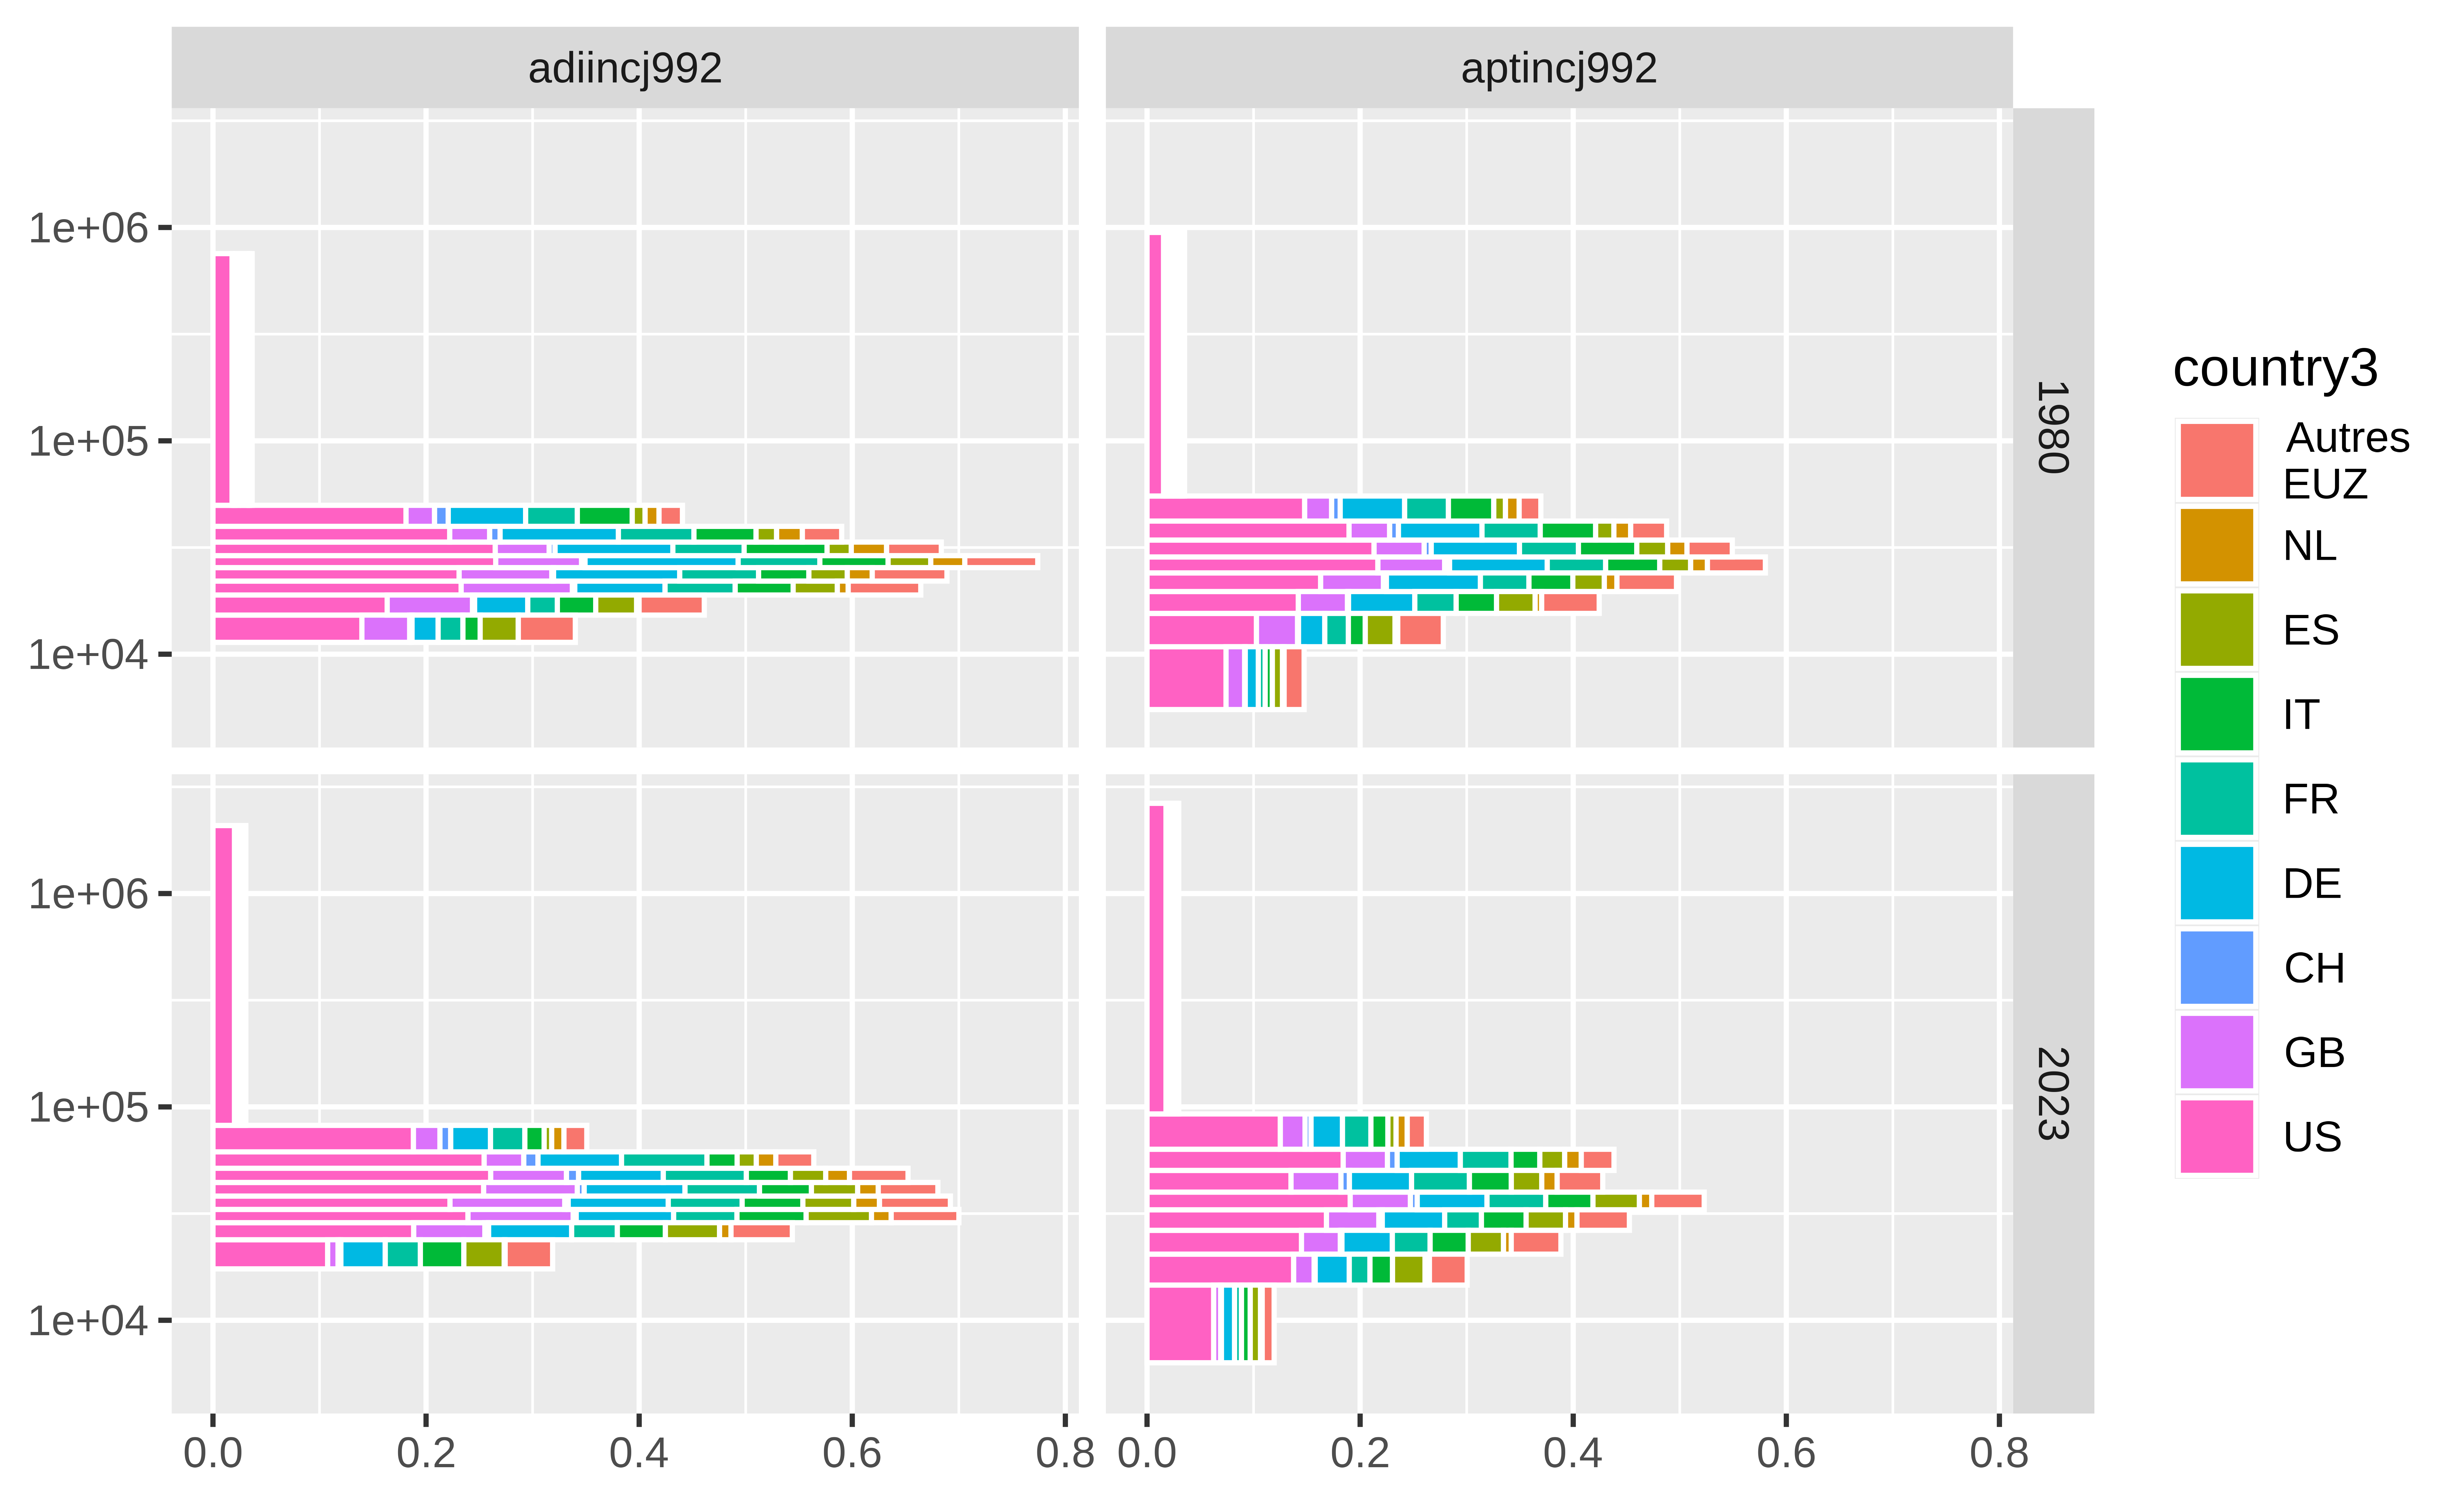

In [ ]:
full_dec <- ofce::source_data("wid.R")$fdec

fnum <- function(x) formatC(x, big.mark =" ", decimal.mark=",", format = "fg", digits=2, width=1)

deciles <- full_dec |> 
  group_by(decile, year, country3, variable) |> 
  summarise(
    revenu_moy = sum(popr*revenu)/sum(popr),
    seuilp = first(seuilp),
    seuilm = first(seuilm)
  ) |> 
  ungroup() |> 
  mutate(
    seuilm = ifelse(seuilm<0, 0, seuilm),
    label = str_c("[", fnum(seuilm), "->", fnum(seuilp), "]") ) |> 
  select(variable, decile, year, country3, label, revenu_moy)

In [ ]:
tabsetize(gg)